In [1]:
import pandas as pd
import re

import matplotlib as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, f1_score

In [2]:
data_set = pd.read_csv('mal_dataset.csv')
data_set.head()

,Title,Type,Score,Score Count,Members,Rank,Popularity,Genres,Authors/Studio,Synopsis,Link,Date,Page
0,Berserk,Manga,9.47,329632,662227,1,1,"Action, Adventure, Award Winning, Drama, Fanta...","Miura, Kentarou (Story & Art), Studio Gaga (Art)","Guts, a former mercenary now known as the ""Bla...",https://myanimelist.net/manga/2/Berserk,15-11-2023,Top Manga
1,JoJo no Kimyou na Bouken Part 7: Steel Ball Run,Manga,9.30,155665,255066,2,26,"Action, Adventure, Mystery, Supernatural, Hist...","Araki, Hirohiko (Story & Art)","In the American Old West, the world's greatest...",https://myanimelist.net/manga/1706/JoJo_no_Kim...,15-11-2023,Top Manga
2,Vagabond,Manga,9.24,135419,362718,3,15,"Action, Adventure, Award Winning, Historical, ...","Inoue, Takehiko (Story & Art), Yoshikawa, Eiji...","In 16th-century Japan, Shinmen Takezou is a wi...",https://myanimelist.net/manga/656/Vagabond,15-11-2023,Top Manga
3,One Piece,Manga,9.22,365241,596855,4,3,"Action, Adventure, Fantasy, Shounen","Oda, Eiichiro (Story & Art)","Gol D. Roger, a man referred to as the ""King o...",https://myanimelist.net/manga/13/One_Piece,15-11-2023,Top Manga
4,Monster,Manga,9.15,93420,235224,5,29,"Award Winning, Drama, Mystery, Adult Cast, Psy...","Urasawa, Naoki (Story & Art)","Kenzou Tenma, a renowned Japanese neurosurgeon...",https://myanimelist.net/manga/1/Monster,15-11-2023,Top Manga


In [3]:
data_set.dropna()

,Title,Type,Score,Score Count,Members,Rank,Popularity,Genres,Authors/Studio,Synopsis,Link,Date,Page
0,Berserk,Manga,9.47,329632,662227,1,1,"Action, Adventure, Award Winning, Drama, Fanta...","Miura, Kentarou (Story & Art), Studio Gaga (Art)","Guts, a former mercenary now known as the ""Bla...",https://myanimelist.net/manga/2/Berserk,15-11-2023,Top Manga
1,JoJo no Kimyou na Bouken Part 7: Steel Ball Run,Manga,9.30,155665,255066,2,26,"Action, Adventure, Mystery, Supernatural, Hist...","Araki, Hirohiko (Story & Art)","In the American Old West, the world's greatest...",https://myanimelist.net/manga/1706/JoJo_no_Kim...,15-11-2023,Top Manga
2,Vagabond,Manga,9.24,135419,362718,3,15,"Action, Adventure, Award Winning, Historical, ...","Inoue, Takehiko (Story & Art), Yoshikawa, Eiji...","In 16th-century Japan, Shinmen Takezou is a wi...",https://myanimelist.net/manga/656/Vagabond,15-11-2023,Top Manga
3,One Piece,Manga,9.22,365241,596855,4,3,"Action, Adventure, Fantasy, Shounen","Oda, Eiichiro (Story & Art)","Gol D. Roger, a man referred to as the ""King o...",https://myanimelist.net/manga/13/One_Piece,15-11-2023,Top Manga
4,Monster,Manga,9.15,93420,235224,5,29,"Award Winning, Drama, Mystery, Adult Cast, Psy...","Urasawa, Naoki (Story & Art)","Kenzou Tenma, a renowned Japanese neurosurgeon...",https://myanimelist.net/manga/1/Monster,15-11-2023,Top Manga
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9679,Grisaia no Rakuen Specials,Special,7.03,31425,60903,3996,2710,Ecchi,8bit,Short specials included in the Blu-ray and DVD...,https://myanimelist.net/anime/31368/Grisaia_no...,20-11-2023,Top Anime
9680,Hana no Ko Lunlun,TV,7.03,1707,5705,3997,7781,"Adventure, Drama",Toei Animation,"The King of the Flower Planet is dying, but hi...",https://myanimelist.net/anime/2230/Hana_no_Ko_...,20-11-2023,Top Anime
9681,Hayate no Gotoku! Can't Take My Eyes Off You,TV,7.03,26202,56046,3998,2836,"Comedy, Harem, Parody, Shounen",Manglobe,Taking place one month after the events that o...,https://myanimelist.net/anime/14653/Hayate_no_...,20-11-2023,Top Anime
9682,Ichigo Mashimaro Episode 0,Special,7.03,8506,15353,3999,5226,"Comedy, CGDCT",Daume,A brief special where the girls pretend to be ...,https://myanimelist.net/anime/4156/Ichigo_Mash...,20-11-2023,Top Anime


In [4]:
data_set.shape

(9684, 13)

In [5]:
print(data_set['Synopsis'].isna().sum())


160


In [6]:
data_set['Synopsis'] = data_set['Synopsis'].fillna('')
data_set['Authors/Studio'] = data_set['Authors/Studio'].fillna('')
data_set['Genres'] = data_set['Genres'].fillna('')
data_set['Type'] = data_set['Type'].fillna('')
data_set['Title'] = data_set['Title'].fillna('')

In [7]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
stop_words = stopwords.words('english')
data_set['Synopsis'] = data_set['Synopsis'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [9]:
print(data_set['Synopsis'])

0       Guts, former mercenary known "Black Swordsman,...
1       In American Old West, world's greatest race be...
2       In 16th-century Japan, Shinmen Takezou wild, r...
3       Gol D. Roger, man referred "King Pirates," set...
4       Kenzou Tenma, renowned Japanese neurosurgeon w...
                              ...                        
9679        Short specials included Blu-ray DVD releases.
9680    The King Flower Planet dying, heir can't take ...
9681    Taking place one month events occurred movie H...
9682            A brief special girls pretend astronauts.
9683    The demon Jashin-chan summoned Earth Yurine Ha...
Name: Synopsis, Length: 9684, dtype: object


In [10]:
# removing special characters
import re

pattern = r'[!@#$%^&*(){};:,.<>\"|+=~`-]'
data_set['Synopsis'] = data_set['Synopsis'].apply(lambda x: re.sub(pattern, '', x) if isinstance(x, str) else '')
data_set['Authors/Studio'] = data_set['Authors/Studio'].apply(lambda x: re.sub(pattern, '', x) if isinstance(x, str) else '')
data_set['Title'] = data_set['Title'].apply(lambda x: re.sub(pattern, '', x) if isinstance(x, str) else '')
data_set['Genres'] = data_set['Genres'].apply(lambda x: re.sub(pattern, '', x) if isinstance(x, str) else '')

In [11]:
print(data_set['Synopsis'])
print(data_set['Authors/Studio'])
print(data_set['Title'])
print(data_set['Genres'])

0       Guts former mercenary known Black Swordsman re...
1       In American Old West world's greatest race beg...
2       In 16thcentury Japan Shinmen Takezou wild roug...
3       Gol D Roger man referred King Pirates set exec...
4       Kenzou Tenma renowned Japanese neurosurgeon wo...
                              ...                        
9679          Short specials included Bluray DVD releases
9680    The King Flower Planet dying heir can't take t...
9681    Taking place one month events occurred movie H...
9682             A brief special girls pretend astronauts
9683    The demon Jashinchan summoned Earth Yurine Han...
Name: Synopsis, Length: 9684, dtype: object
0            Miura Kentarou Story  Art Studio Gaga Art
1                            Araki Hirohiko Story  Art
2       Inoue Takehiko Story  Art Yoshikawa Eiji Story
3                              Oda Eiichiro Story  Art
4                             Urasawa Naoki Story  Art
                             ...           

In [12]:
type_of_media = data_set['Type'].unique()
for i in range(len(type_of_media)):
    print(type_of_media[i])

Manga
Light Novel
Novel
Manhwa
Manhua
One-shot
Doujinshi
TV
Movie
OVA
Special
ONA


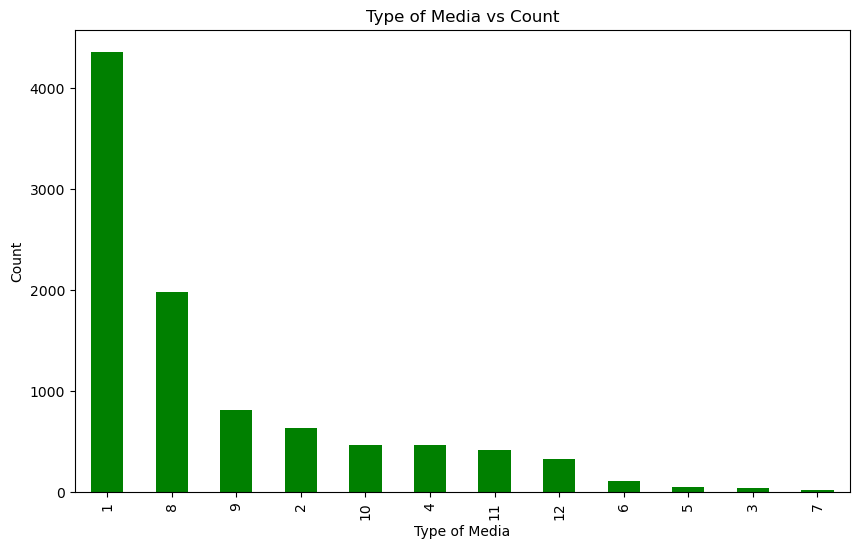

In [13]:
# bar graph of type of media
import matplotlib.pyplot as plt

type_of_media_mapping = {'Manga': 1, 'Light Novel': 2, 'Novel': 3, 'Manhwa': 4, 'Manhua': 5, 'One-shot': 6, 'Doujinshi': 7, 'TV': 8, 'Movie': 9, 'OVA': 10, 'Special': 11, 'ONA': 12}
type_of_media_counts = data_set['Type'].map(type_of_media_mapping).value_counts()

plt.figure(figsize=(10, 6))
type_of_media_counts.plot(kind='bar', color='green')
plt.xlabel('Type of Media')
plt.ylabel('Count')
plt.title('Type of Media vs Count')
plt.show()

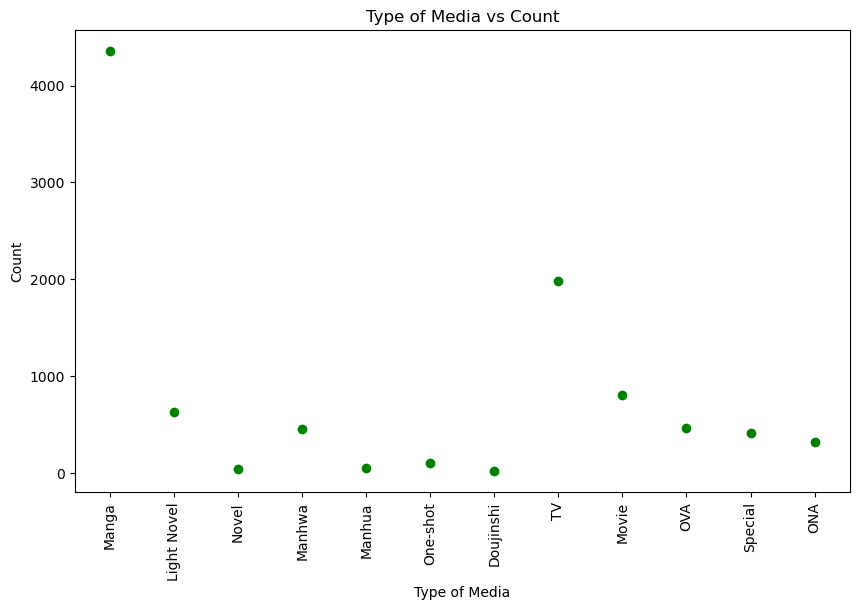

In [14]:
# scatter plot of type of media
import matplotlib.pyplot as plt

type_of_media_mapping = {'Manga': 1, 'Light Novel': 2, 'Novel': 3, 'Manhwa': 4, 'Manhua': 5, 'One-shot': 6, 'Doujinshi': 7, 'TV': 8, 'Movie': 9, 'OVA': 10, 'Special': 11, 'ONA': 12}
type_of_media_counts = data_set['Type'].map(type_of_media_mapping).value_counts()

plt.figure(figsize=(10, 6))
plt.scatter(type_of_media_counts.index, type_of_media_counts.values, color='green')
plt.xlabel('Type of Media')
plt.ylabel('Count')
plt.title('Type of Media vs Count')
plt.xticks(list(type_of_media_mapping.values()), list(type_of_media_mapping.keys()), rotation='vertical')
plt.show()

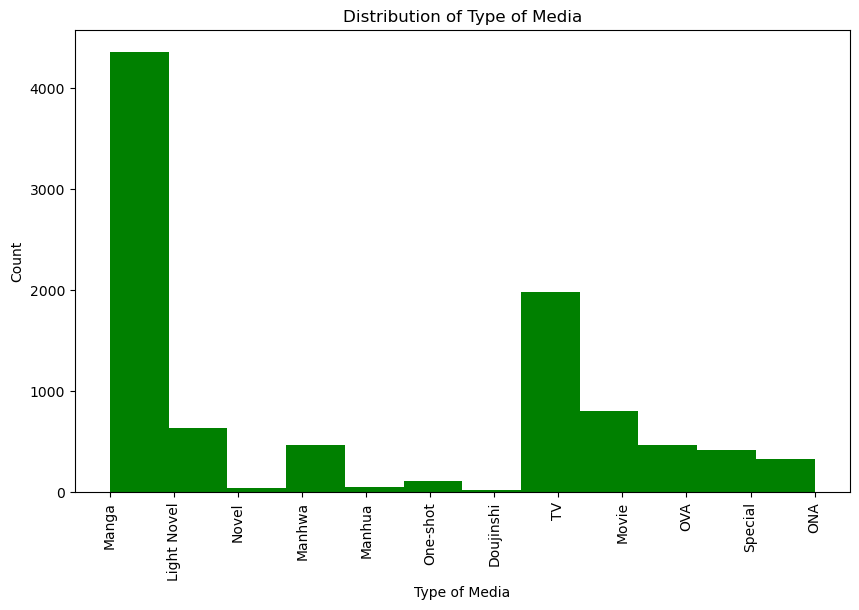

In [15]:
# histogram graph of type of media
import matplotlib.pyplot as plt

type_of_media_mapping = {'Manga': 1, 'Light Novel': 2, 'Novel': 3, 'Manhwa': 4, 'Manhua': 5, 'One-shot': 6, 'Doujinshi': 7, 'TV': 8, 'Movie': 9, 'OVA': 10, 'Special': 11, 'ONA': 12}
type_of_media_counts = data_set['Type'].map(type_of_media_mapping)

plt.figure(figsize=(10, 6))
plt.hist(type_of_media_counts, bins=len(type_of_media_mapping), color='green')
plt.xlabel('Type of Media')
plt.ylabel('Count')
plt.title('Distribution of Type of Media')
plt.xticks(list(type_of_media_mapping.values()), list(type_of_media_mapping.keys()), rotation='vertical')
plt.show()

In [16]:
from sklearn.feature_extraction.text import HashingVectorizer

hash_vectorizer = HashingVectorizer(n_features=2**16)
hash_matrix = hash_vectorizer.fit_transform(data_set['Synopsis'])


y = data_set['Page']
print(hash_matrix)

  (0, 341)	0.09950371902099892
  (0, 1657)	-0.09950371902099892
  (0, 1849)	-0.09950371902099892
  (0, 1966)	0.09950371902099892
  (0, 2579)	0.09950371902099892
  (0, 2813)	0.09950371902099892
  (0, 3201)	0.09950371902099892
  (0, 3973)	0.09950371902099892
  (0, 4892)	0.09950371902099892
  (0, 6599)	-0.09950371902099892
  (0, 8204)	-0.09950371902099892
  (0, 9034)	0.09950371902099892
  (0, 10356)	-0.09950371902099892
  (0, 11060)	-0.09950371902099892
  (0, 12511)	0.09950371902099892
  (0, 13082)	0.09950371902099892
  (0, 16767)	-0.09950371902099892
  (0, 17420)	-0.09950371902099892
  (0, 17700)	0.09950371902099892
  (0, 18372)	0.19900743804199783
  (0, 18718)	-0.09950371902099892
  (0, 18970)	0.09950371902099892
  (0, 20780)	0.09950371902099892
  (0, 20803)	0.09950371902099892
  (0, 21764)	-0.19900743804199783
  :	:
  (9683, 45574)	0.08084520834544433
  (9683, 47421)	-0.08084520834544433
  (9683, 48725)	-0.08084520834544433
  (9683, 48952)	0.08084520834544433
  (9683, 48977)	0.08084520

In [17]:
#Classification LAgorithm 1
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(hash_matrix, y, test_size=0.2, random_state=42)

logistic_regression = LogisticRegression(max_iter=1000)
logistic_regression.fit(x_train, y_train)


LogisticRegression(max_iter=1000)

In [18]:
# classification report of logistic model
y_pred = logistic_regression.predict(x_test)
logistic_regression_report = classification_report(y_test, y_pred, zero_division=1)
print(logistic_regression_report)

              precision    recall  f1-score   support

   Top Anime       0.74      0.71      0.72       781
   Top Manga       0.81      0.83      0.82      1156

    accuracy                           0.78      1937
   macro avg       0.77      0.77      0.77      1937
weighted avg       0.78      0.78      0.78      1937



In [19]:
# desicion tree
from sklearn.tree import DecisionTreeClassifier

# Split the data
x_train, x_test, y_train, y_test = train_test_split(hash_matrix, y, test_size=0.2, random_state=42)

# Create and train the model
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [20]:
# calssification report of decision tree
y_pred_dt = decision_tree.predict(x_test)

# Evaluate and print the classification report
decision_tree_report = classification_report(y_test, y_pred_dt, zero_division=1)
print(decision_tree_report)


              precision    recall  f1-score   support

   Top Anime       0.65      0.68      0.67       781
   Top Manga       0.78      0.75      0.77      1156

    accuracy                           0.73      1937
   macro avg       0.72      0.72      0.72      1937
weighted avg       0.73      0.73      0.73      1937



In [21]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

# Split the data
x_train, x_test, y_train, y_test = train_test_split(hash_matrix, y, test_size=0.2, random_state=42)

# Create and train the model
random_forest = RandomForestClassifier()
random_forest.fit(x_train, y_train)


RandomForestClassifier()

In [22]:
# classification report of random forest
y_pred_rf = random_forest.predict(x_test)

# Evaluate and print the classification report
random_forest_report = classification_report(y_test, y_pred_rf, zero_division=1)
print(random_forest_report)

              precision    recall  f1-score   support

   Top Anime       0.73      0.69      0.71       781
   Top Manga       0.80      0.83      0.81      1156

    accuracy                           0.77      1937
   macro avg       0.77      0.76      0.76      1937
weighted avg       0.77      0.77      0.77      1937



In [23]:
#support vector machine svm
from sklearn.svm import SVC

# Split the data
x_train, x_test, y_train, y_test = train_test_split(hash_matrix, y, test_size=0.2, random_state=42)

# Create and train the model
svm_classifier = SVC()
svm_classifier.fit(x_train, y_train)

SVC()

In [24]:
# support vector machines classification report
y_pred_svm = svm_classifier.predict(x_test)

# Evaluate and print the classification report
svm_report = classification_report(y_test, y_pred_svm, zero_division=1)
print(svm_report)


              precision    recall  f1-score   support

   Top Anime       0.71      0.73      0.72       781
   Top Manga       0.82      0.80      0.81      1156

    accuracy                           0.77      1937
   macro avg       0.76      0.77      0.76      1937
weighted avg       0.77      0.77      0.77      1937

